In [3]:
import folium
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import unicodedata


In [5]:
df = pd.read_csv('dengue.csv')

In [6]:
for i in range(0,len(df)):
    cidades = str(df.loc[i,'no_cidade'])
    prc = unicodedata.normalize('NFD',cidades)
    prc = prc.encode('ascii','ignore')
    prc = prc.decode('utf-8')
    prc = prc.upper()
    df.at[i,'no_cidade'] = prc

In [7]:
df = df.rename(columns={'no_cidade':'MUNICIPIO'})

In [8]:
geo = pd.read_excel('MunicipiosBrasil.xls')

In [9]:
df1 = pd.merge(df , geo , left_on='MUNICIPIO',right_on='MUNICIPIO')

In [10]:
df1 = df1.query('indicx > 0')

In [11]:
df1 = df1.drop_duplicates()

In [12]:
df1 = df1.loc[0:,['indicx','MUNICIPIO','UF','LATITUDE','LONGITUDE']]

In [13]:
mg = df1.query('UF == "MG"')

In [14]:
m = folium.Map(location=[-8.272112, -52.947273])

In [15]:
for index , linha in df1.iterrows():
    folium.CircleMarker([linha['LATITUDE'],linha['LONGITUDE']],
                       radius=int(linha['indicx']*5),
                       popup=linha['MUNICIPIO'] + '- Ocorrencia : ' + str(linha['indicx']),
                       fill_color ='3db7e4').add_to(m)

In [16]:
m

<BarContainer object of 29 artists>

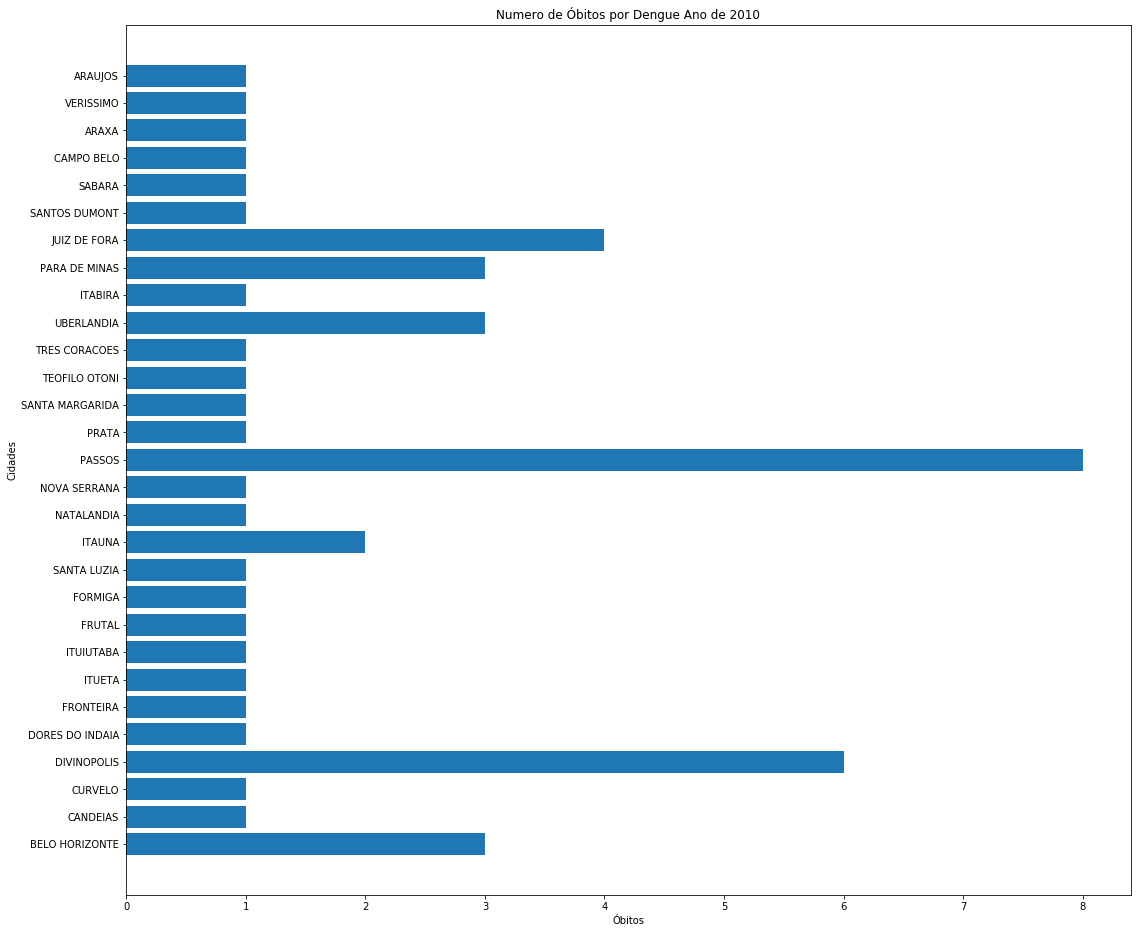

In [18]:
plt.figure(figsize=(18,16))
plt.title("Numero de Óbitos por Dengue Ano de 2010")
plt.ylabel('Cidades')
plt.xlabel('Óbitos')
plt.barh(mg['MUNICIPIO'], mg['indicx'] , align='center' )

In [19]:
casos_uf = df1.loc[0:,['UF','indicx']]

In [21]:
uf = casos_uf.loc[0: ,['UF']]     

In [22]:
uf = uf.drop_duplicates()

In [24]:
soma = 0
for index , i in uf.iterrows():
    
 

    for indx , j in casos_uf.iterrows():
        if(j['UF'] == i['UF']):
            soma +=j['indicx']        
    uf.at[index,'Total_Casos']  = soma  
    soma = 0
   
  
        

<BarContainer object of 26 artists>

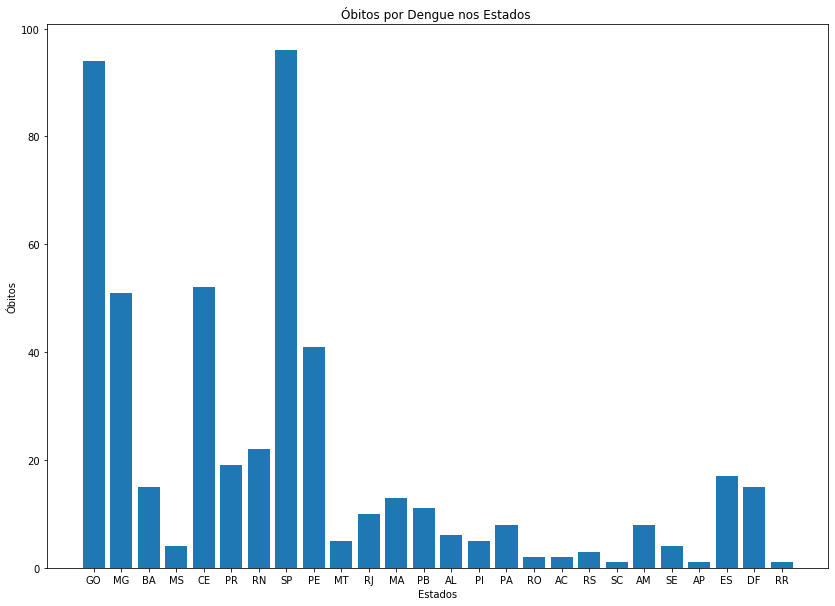

In [26]:
plt.figure(figsize=(14,10))
plt.title("Óbitos por Dengue nos Estados ")
plt.xlabel('Estados')
plt.ylabel('Óbitos')
plt.bar(uf['UF'],uf['Total_Casos'])

,indicx,MUNICIPIO,ID,LATITUDE,LONGITUDE,Mun/UF,UF,Valor
